# Package Installations

In [1]:
#! pip install numpy opencv-python matplotlib pillow imutils

# Package Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils
import json

from PIL import Image

# Global Parameters

In [6]:
IMAGE_PATH = "./images/room_maps/Earth Sciences_162_v2.png"
OUTPUT_PATH = "./json/seat_positions/Earth Sciences_162.json"

# Display Original Image

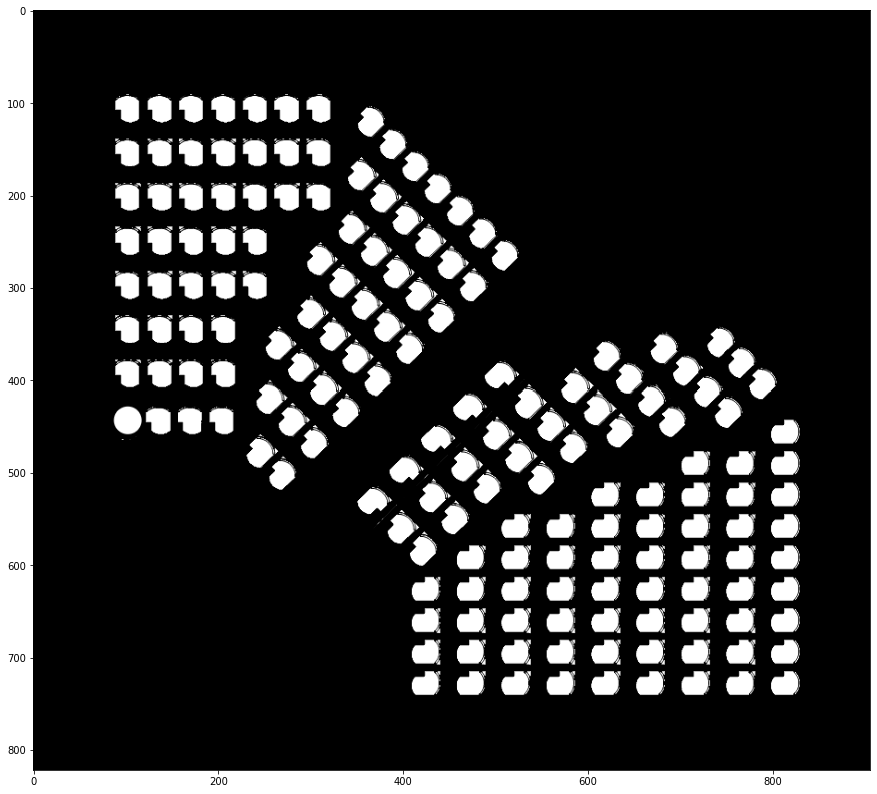

In [9]:
image = cv2.imread(IMAGE_PATH)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (15, 15))
plt.imshow(image_gray, cmap = 'gray')

# Pre-Process Image

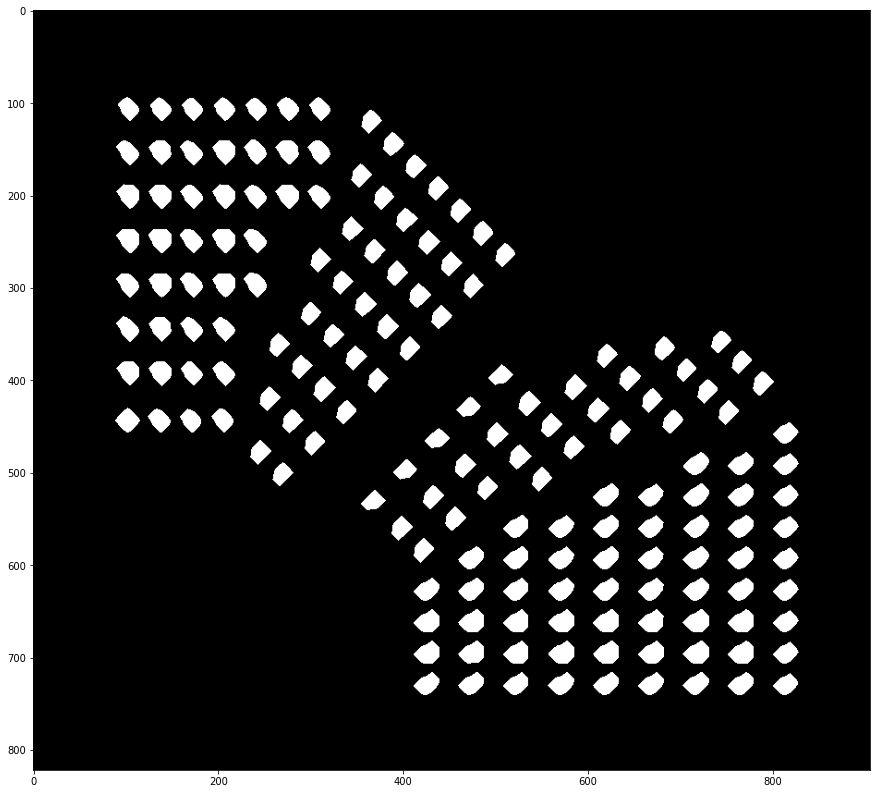

In [50]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
dilated = cv2.dilate(image_gray, kernel)
blurred = cv2.medianBlur(dilated, 9)
ret, thresholded = cv2.threshold(blurred, 127, 255, 0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresholded,kernel,iterations = 3)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
dilated = cv2.dilate(erosion, kernel, iterations = 5)

plt.figure(figsize = (15, 15))
plt.imshow(dilated, cmap = 'gray')

# Identify & Label Seats

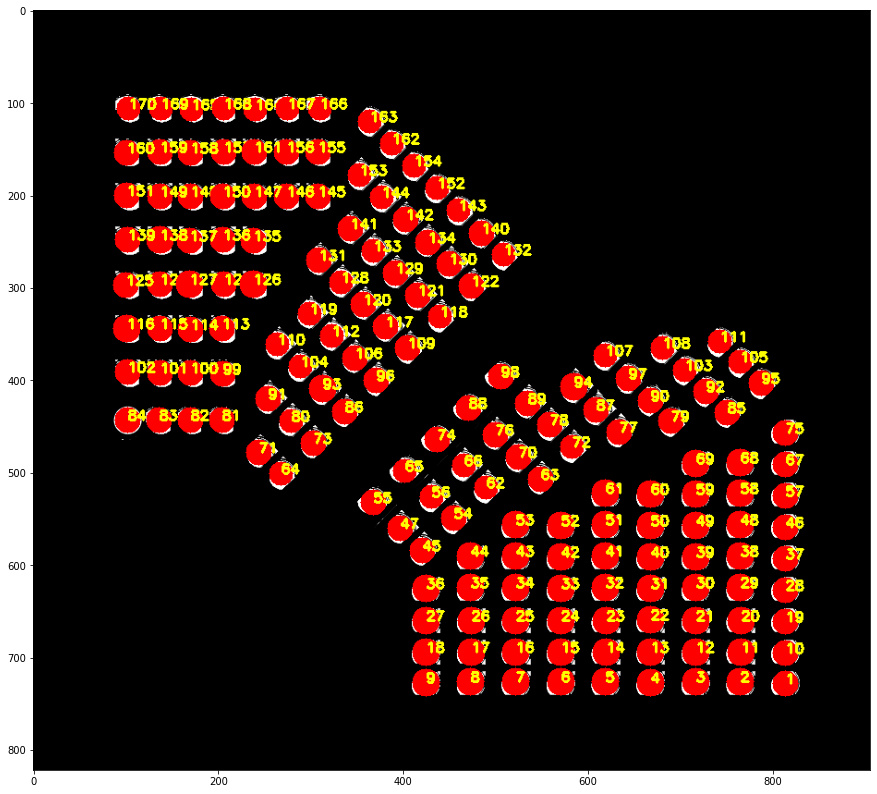

In [52]:
height, width, _ = image.shape
contours = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
image = cv2.imread(IMAGE_PATH)
ID = 1
SEATS = []

for c in contours:
    # compute the center of the contour
#     M = cv2.moments(c)
#     cX = int(M["m10"] / M["m00"])
#     cY = int(M["m01"] / M["m00"])
#     cv2.circle(image, (cX, cY), 14, (255, 0, 0), -1)
#     cv2.putText(image, str(ID), (cX, cY),
#     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
    (x, y), r = cv2.minEnclosingCircle(c)
    x, y, r = int(x), int(y), int(r * 1.1)
    
    cv2.circle(image, (x, y), r, (255, 0, 0), -1)
    cv2.putText(image, str(ID), (x, y),
    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
    
    
    SEATS.append({
        'x' : x / width,
        'y' : y / height,
        'r' : r / width,
        'id' : ID
    })
    
    ID += 1
    
plt.figure(figsize = (15, 15))
plt.imshow(image)

In [53]:
with open(OUTPUT_PATH, 'w') as fout:
    json.dump(SEATS , fout)

# Workbench

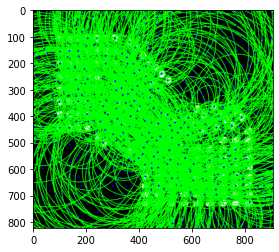

In [18]:
plt.imshow(cimg)

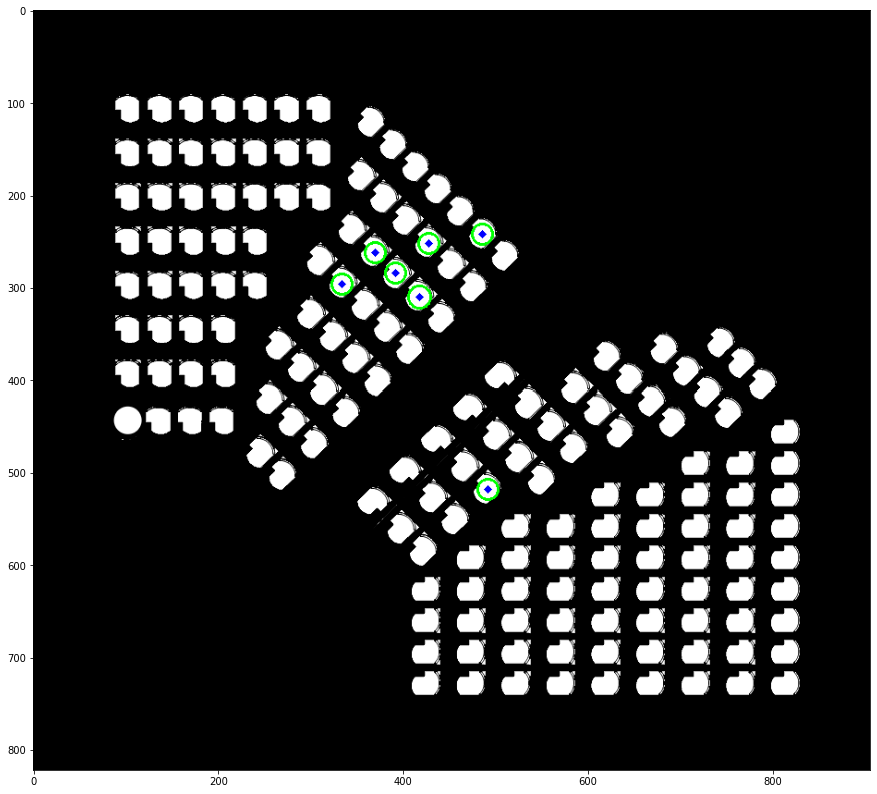

In [36]:
img = cv2.imread(IMAGE_PATH, 0)
img = cv2.medianBlur(img,5)
#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
image = cv2.imread(IMAGE_PATH)


circles = cv2.HoughCircles(dilated,cv2.HOUGH_GRADIENT,1,3,
                            param1=50,param2=30, minRadius=0,maxRadius=100)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(image,(i[0],i[1]),2,(0,0,255),3)

plt.figure(figsize = (15, 15))
plt.imshow(image)

1